# Project Overview
This project aims to analyze a dataset of car listings to understand selling patterns, identify key influencing factors, and provide business insights into the used car market.


# Import Libraries & Load Data


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



# Load the dataset
df = pd.read_csv("/Users/xy/Desktop/car-sales/data/car_prices.csv")
df.head()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


# Initial Data Exploration

In [22]:
df.info()
df.describe()
df.isnull().sum()
df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


year                34
make                96
model              973
trim              1963
body                87
transmission         4
vin             550297
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
dtype: int64

# Data Cleaning

In [23]:
df = df.drop_duplicates()

df.drop(columns=['vin'], inplace=True)

df.dropna(inplace=True)


# Exploratory Data Analysis

### Percentage Of Each Car Make

In [24]:
# Count the number of cars for each make (exclude missing values)
make_counts = df['make'].dropna().value_counts().reset_index()
make_counts.columns = ['make', 'count']

# Create interactive pie chart for ALL makes
fig = px.pie(
    make_counts,
    values='count',
    names='make',
    title='Distribution of All Car Makes',
    hover_data=['count'],
    labels={'count': 'Number of Cars'}
)

# Show both percent and label on chart
fig.update_traces(textinfo='percent+label')

# Display the interactive pie chart
fig.show()


### Best selling models out of the top 10 makes

In [25]:
# Get top 10 car makes by count
top_makes = df['make'].value_counts().head(10).index

# Filter to only rows with those top makes
top_makes_df = df[df['make'].isin(top_makes)]

# Step 3: Group by make and model, count sales
make_model_counts = top_makes_df.groupby(['make', 'model']).size().reset_index(name='count')

# For each make, get top 3 models
top_models_per_make = make_model_counts.sort_values(['make', 'count'], ascending=[True, False])
top3_models = top_models_per_make.groupby('make').head(3)

# Interactive grouped bar chart with Plotly
fig = px.bar(
    top3_models,
    x='make',
    y='count',
    color='model',
    barmode='group',
    title='Top 3 Selling Models for Each of the Top 10 Makes',
    labels={'count': 'Number of Cars Sold'},
    hover_data=['model', 'count']
)

fig.update_layout(xaxis_title='Car Make', yaxis_title='Number of Cars Sold')
fig.show()

### Best selling model in each state

In [26]:

# Group by state and model, count how many times each model was sold
state_model_counts = df.groupby(['state', 'model']).size().reset_index(name='count')

# Sort so that top model for each state appears first
state_model_counts = state_model_counts.sort_values(['state', 'count'], ascending=[True, False])

# For each state, keep only the top-selling model
top_model_per_state = state_model_counts.groupby('state').head(1).reset_index(drop=True)

# Create an interactive bar chart
fig = px.bar(
    top_model_per_state,
    x='state',
    y='count',
    color='model',
    title='Best-Selling Car Model in Each State',
    labels={'count': 'Number of Cars Sold', 'state': 'State', 'model': 'Car Model'},
    hover_data=['model', 'count']
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()


### Distribution of vehicle body types

In [27]:
# Convert all body values to lowercase and strip whitespace
df['body_cleaned'] = df['body'].str.lower().str.strip()

# Optional: Map similar terms to a standard name
body_mapping = {
    'sedan': 'sedan',
    'hatchback': 'hatchback',
    'coupe': 'coupe',
    'crew cab': 'pickup',
    'supercrew': 'pickup',
    'quad cab': 'pickup',
    'extended cab': 'pickup',
    'supercab': 'pickup',
    'crew cab pickup': 'pickup',
    'convertible': 'convertible',
    'suv': 'suv',
    'sport utility': 'suv',
    'sportutilityvehicle': 'suv',
    'wagon': 'wagon',
    'van': 'van',
    # Add more variations if needed
}

df['body_standardized'] = df['body_cleaned'].replace(body_mapping)

# Then count the cleaned body types
body_counts = df['body_standardized'].value_counts().reset_index()
body_counts.columns = ['body', 'count']


fig = px.bar(
    body_counts,
    x='body',
    y='count',
    title='Distribution of Vehicle Body Types (Standardized)',
    labels={'count': 'Number of Vehicles', 'body': 'Body Type'},
    hover_data=['count']
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()



### Selling trend by vehicle body type

In [28]:
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True)
df['sale_year'] = df['saledate'].dt.year


# Clean/standardize body column
df['body_cleaned'] = df['body'].str.lower().str.strip()
body_mapping = {
    'sedan': 'sedan',
    'hatchback': 'hatchback',
    'coupe': 'coupe',
    'suv': 'suv',
    'sport utility': 'suv',
    'sportutilityvehicle': 'suv',
    'crew cab': 'pickup',
    'supercrew': 'pickup',
    'quad cab': 'pickup',
    'extended cab': 'pickup',
    'supercab': 'pickup',
    'convertible': 'convertible',
    'wagon': 'wagon',
    'van': 'van',
    # Add more mappings if needed
}
df['body_standardized'] = df['body_cleaned'].replace(body_mapping)

# Group by year and body, count vehicles sold
trend = (
    df.groupby(['sale_year', 'body_standardized'])
    .size()
    .reset_index(name='count')
    .dropna()
)

# Plot interactive line chart
fig = px.line(
    trend,
    x='sale_year',
    y='count',
    color='body_standardized',
    title='Yearly Selling Trend by Vehicle Body Type',
    labels={'sale_year': 'Year', 'count': 'Number of Vehicles', 'body_standardized': 'Body Type'},
    markers=True
)

fig.show()


/var/folders/wl/gyp1nsjd5xgb7kvb04ck509h0000gn/T/ipykernel_74509/2953537942.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



### Analysing linear realationship of sellingprice with odometer, mmr, carage, and condition

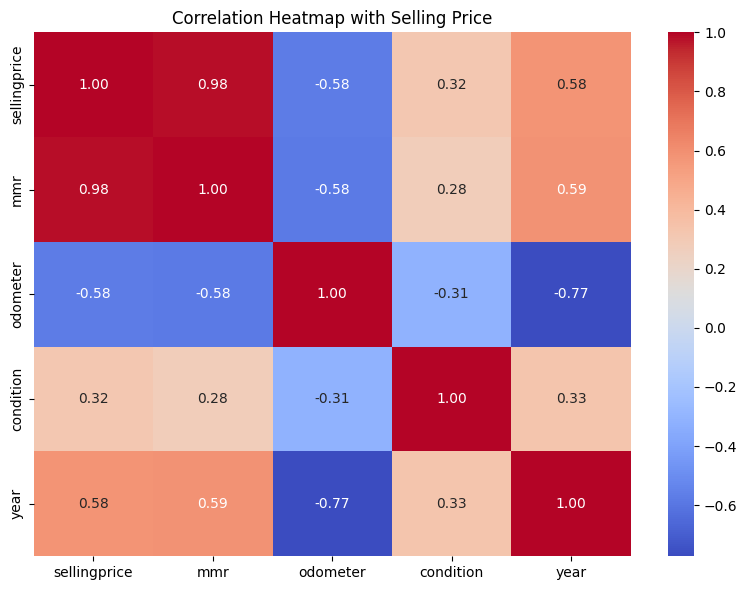

In [29]:
selected_cols = ['sellingprice', 'mmr', 'odometer', 'condition', 'year']
df_corr = df[selected_cols].copy()

df_corr = df_corr.apply(pd.to_numeric, errors='coerce')
df_corr = df_corr.dropna(axis=1, how='all')
df_corr = df_corr.dropna(axis=0, how='any') 

correlation_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap with Selling Price")
plt.tight_layout()
plt.show()

# Linear regression

In [30]:
import statsmodels.api as sm
cols = ['sellingprice', 'mmr', 'odometer', 'condition', 'year']
df = df[cols].apply(pd.to_numeric, errors='coerce')  # convert to numeric
df = df.dropna()  # drop rows with missing values

# Define X and y
X = df[['mmr', 'odometer', 'condition', 'year']]
y = df['sellingprice']

# Add constant term to X (intercept)
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Show model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           sellingprice   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                 3.773e+06
Date:                Wed, 09 Apr 2025   Prob (F-statistic):               0.00
Time:                        02:47:04   Log-Likelihood:            -4.1764e+06
No. Observations:              472325   AIC:                         8.353e+06
Df Residuals:                  472320   BIC:                         8.353e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.769e+04   2115.223     41.455      0.0

# Random forest model

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Select and clean relevant columns
features = ['mmr', 'odometer', 'condition', 'year']
df = df[['sellingprice'] + features].apply(pd.to_numeric, errors='coerce')
df = df.dropna()

# Define X and y
X = df[features]
y = df['sellingprice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Performance:")
print("MAE:", round(mae, 2))
print("R² Score:", round(r2, 4))

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature Importances:")
print(importances.sort_values(ascending=False))


Random Forest Performance:
MAE: 1005.71
R² Score: 0.9735
Feature Importances:
mmr          0.971060
odometer     0.015619
condition    0.010030
year         0.003291
dtype: float64


### Visualiazation for evaluation

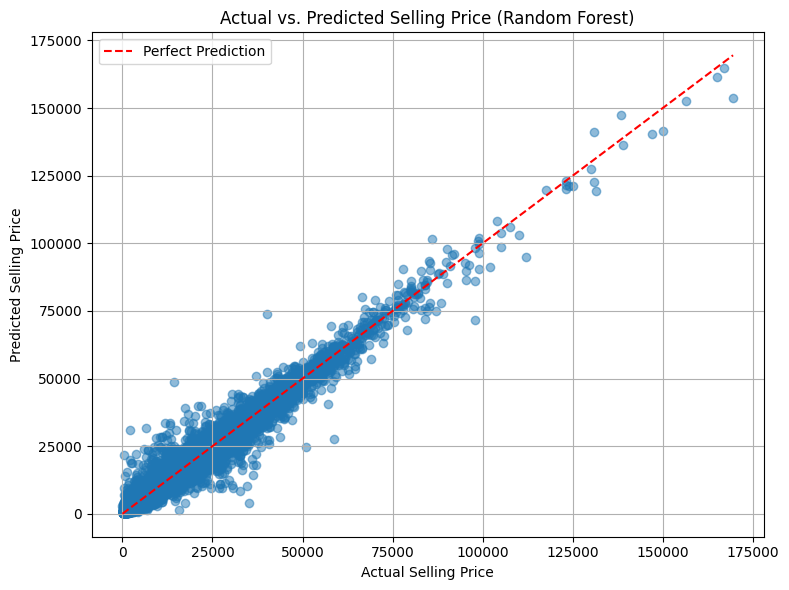

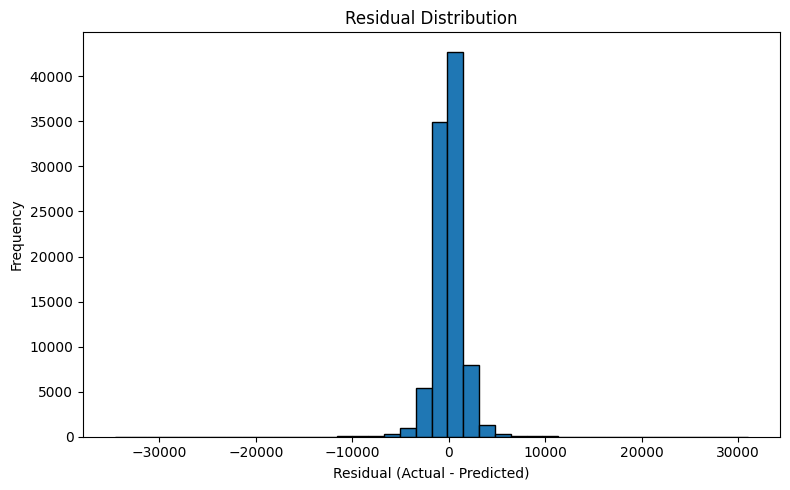

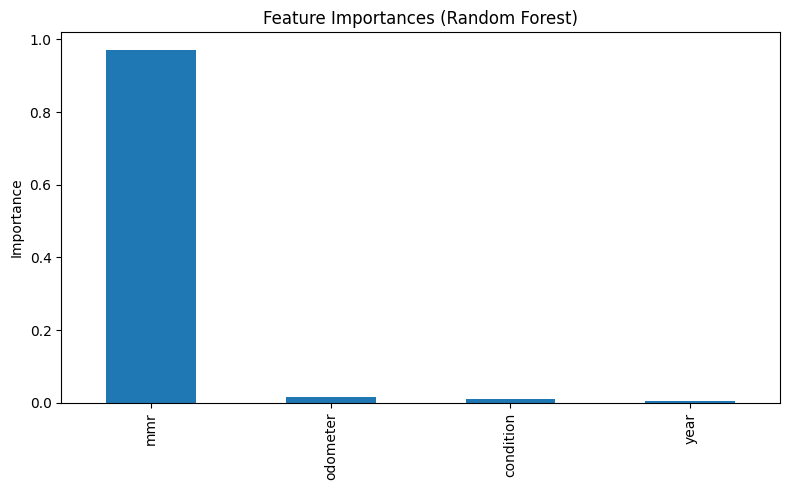

In [32]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Price (Random Forest)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=40, edgecolor='black')
plt.title("Residual Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
importances.plot(kind='bar')
plt.title("Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# XGboost

 MAE: 969.91
 R² Score: 0.9613


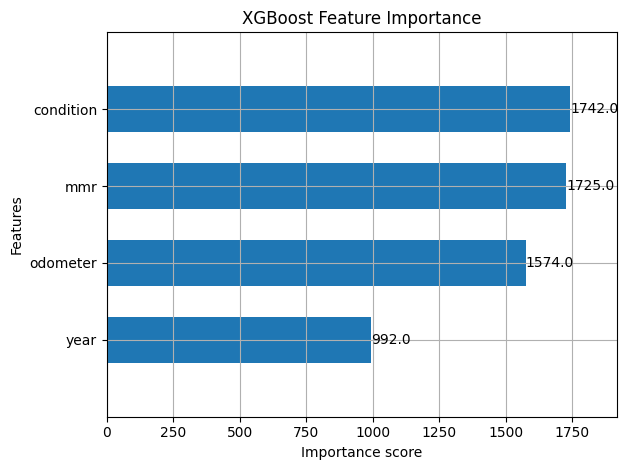

In [33]:
# XGBoost Regressor
import xgboost as xgb

# Load and clean the data
features = ['mmr', 'odometer', 'condition', 'year']
df = df[['sellingprice'] + features].apply(pd.to_numeric, errors='coerce').dropna()

# Define features and target
X = df[features]
y = df['sellingprice']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    objective='reg:squarederror'
)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" MAE: {mae:.2f}")
print(f" R² Score: {r2:.4f}")

# Plot feature importance
xgb.plot_importance(model, height=0.6)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()


# Lasso Regression

MAE: 1040.47
R² Score: 0.9710

🔍 Coefficients:
     Feature  Coefficient
0        mmr  9380.112663
1   odometer   -55.022525
2  condition   499.013774
3       year  -163.551483


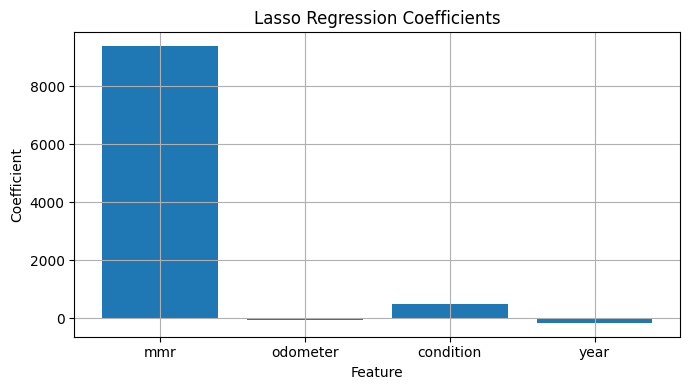

In [34]:

# Define features and target
X = df[features]
y = df['sellingprice']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit Lasso Regression
model = Lasso(alpha=0.1, random_state=42)  # adjust alpha for more or less regularization
model.fit(X_train, y_train)

# SEvaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

# Show coefficients
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print("\n🔍 Coefficients:")
print(coef_df)

# Plot coefficients
plt.figure(figsize=(7, 4))
plt.bar(coef_df['Feature'], coef_df['Coefficient'])
plt.title("Lasso Regression Coefficients")
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.grid(True)
plt.tight_layout()
plt.show()
